# Visualize cloud liquid water field

Data is from a large eddy simulation of trade cumulus clouds.  

* Single timestep at 12.5 m x, y, z grid spacing

* Variable is QN -- cloud liquid water (g/kg)


## link to data file

The netcdf file:  bomex_qv_qn.nc -- 527 Mbytes

[https://drive.google.com/file/d/1E0IORCCpZUGaMClbv2m4YFfiM34kC1FY/view?usp=sharing](https://drive.google.com/file/d/1E0IORCCpZUGaMClbv2m4YFfiM34kC1FY/view?usp=sharing)


In [1]:
import xarray as xr
from pathlib import Path
from vapor import session, renderer, dataset, camera

Vapor 3.8.3
Python 3.9.16 (/home/phil/mini39/envs/vapor)
OpenGL 4.6.0 NVIDIA 470.182.03


## adjust path to point to file 

In [2]:
the_file = Path().resolve() / 'bomex_qv_qn.nc'
print(the_file)
the_file.exists()

/home/phil/repos/vapor-python-cookbook/notebooks/bomex_qv_qn.nc


True

## Inspect the xarray dataset

In [3]:
bomex_data = xr.open_dataset(the_file)
bomex_data

<xarray.Dataset>
Dimensions:  (x: 512, y: 512, z: 256, time: 1)
Coordinates:
  * x        (x) float32 0.0 12.5 25.0 37.5 ... 6.362e+03 6.375e+03 6.388e+03
  * y        (y) float32 0.0 12.5 25.0 37.5 ... 6.362e+03 6.375e+03 6.388e+03
  * z        (z) float32 12.5 25.0 37.5 50.0 ... 3.175e+03 3.188e+03 3.2e+03
  * time     (time) float32 0.1264
Data variables:
    p        (z) float32 ...
    QV       (time, z, y, x) float32 ...
    QN       (time, z, y, x) float32 ...

## open as a Vapor dataset

In [4]:
ses = session.Session()
data = ses.OpenDataset(dataset.CF, [str(the_file)])

In [5]:
print("Time Coordinate Variable Name:", data.GetTimeCoordVarName())
print("Coordinate Variable Names:", data.GetCoordVarNames())

print("Dimensions:")
for dim in data.GetDimensionNames():
    print(f"  {dim}:", data.GetDimensionLength(dim, 0))

print("Data Variables:")
for var in data.GetDataVarNames():
    print(f"  {var}")
    print(f"    Time Varying:", bool(data.IsTimeVarying(var)))
    print(f"    Dimensionality:", data.GetVarGeometryDim(var))
    print(f"    Coordinates:", data.GetVarCoordVars(var, True))
    print("     Data Range:", data.GetDataRange(var))

Time Coordinate Variable Name: time
Coordinate Variable Names: ['time', 'x', 'y', 'z']
Dimensions:
  time: 1
  x: 512
  y: 512
  z: 256
Data Variables:
  QN
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['x', 'y', 'z']
     Data Range: [0.0, 2.0163745880126953]
  QV
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['x', 'y', 'z']
     Data Range: [2.760067939758301, 18.385417938232422]


## Show gridcells

Top view of cloud field, with threshold set to 0.01 g/kg

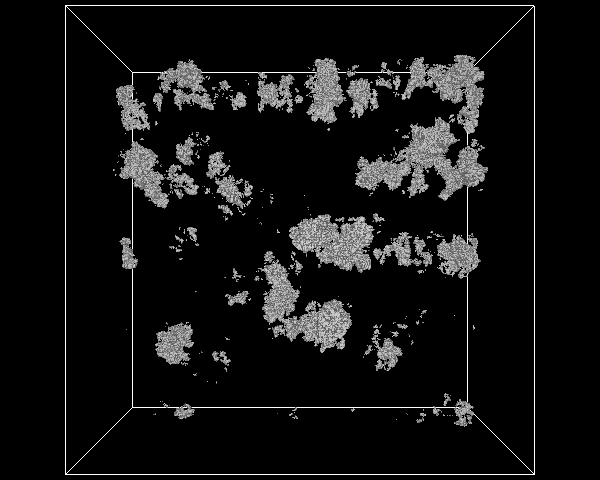

In [6]:
ren = data.NewRenderer(renderer.VolumeIsoRenderer)
ren.SetVariableName(data.GetDataVarNames(3)[0]) # Set to first 3D data variable
ren.SetIsoValues([0.01])

ses.GetCamera().ViewAll()
ses.Show()

## Create visualizer widget

In [7]:
from jupyter_vapor_widget import *

viz = VaporVisualizerWidget(ses)
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…

## Add a slider bar

In [8]:
tf = ren.GetPrimaryTransferFunction()
dataRange = tf.GetMinMaxMapValue()

def sliderChanged(change):
    ren.SetIsoValues([change.new])
    viz.Render(fast=True)

slider = widgets.FloatSlider(value=ren.GetIsoValues()[0], min=dataRange[0], max=dataRange[1], step=(dataRange[1]-dataRange[0])/100)
slider.observe(sliderChanged, names='value')

widgets.VBox([
    viz,
    widgets.HBox([widgets.Label("Iso value:"), slider])
])